In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.0 MB/s eta 0:00:00


In [ ]:
!pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 847.4/847.4 KB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 17.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.4 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.17.14-py3-none-any.whl size=119103 sha256=034c4a339406c9d49e1d1789b7b3e2919107e394f0109fa1464a476da6139835
  Stored in directory: /root/.cache/pip/wheels/d5/56/6a/52862f46d18e3abc24f8c770e9790ab9ea07e1ebf1e7d18627
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=43342154691e187573c1d5ad3a683e914ae9a95564a255c36c0d2132b3e8aa3f
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built scalecast eli5


In [ ]:
import numpy as np # default numpy
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import os
import collections

from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
monthlyPrices = pd.read_csv('gdrive/My Drive/Colab Notebooks/Gold Price Prediction EDA/Prices_monthly_consumer.csv')

In [ ]:
monthlyPrices.head()

,Name,Indian rupee,Chinese renmimbi,US dollar,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Euro,Russian ruble
0,31-12-1978,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN
1,31-01-1979,1840.8,NaN,233.7,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,144.8,NaN
2,28-02-1979,2011.7,NaN,251.3,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,154.6,NaN
3,30-03-1979,1940.2,NaN,240.1,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,148.0,NaN
4,30-04-1979,2013.1,NaN,245.3,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,152.8,NaN


In [ ]:
monthlyPrices.shape

(529, 14)

In [ ]:
monthlyPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               529 non-null    object 
 1   Indian rupee       528 non-null    float64
 2   Chinese renmimbi   456 non-null    float64
 3   US dollar          529 non-null    float64
 4   Turkish lira       481 non-null    float64
 5   Saudi riyal        528 non-null    float64
 6   Indonesian rupiah  528 non-null    float64
 7   UAE dirham         528 non-null    float64
 8   Thai baht          528 non-null    float64
 9   Vietnamese dong    397 non-null    float64
 10  Egyptian pound     409 non-null    float64
 11  Korean won         528 non-null    float64
 12  Euro               529 non-null    float64
 13  Russian ruble      360 non-null    float64
dtypes: float64(13), object(1)
memory usage: 58.0+ KB


In [ ]:
monthlyPrices = monthlyPrices.interpolate()
monthlyPrices.head()

,Name,Indian rupee,Chinese renmimbi,US dollar,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Euro,Russian ruble
0,31-12-1978,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN
1,31-01-1979,1840.8,NaN,233.7,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,144.8,NaN
2,28-02-1979,2011.7,NaN,251.3,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,154.6,NaN
3,30-03-1979,1940.2,NaN,240.1,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,148.0,NaN
4,30-04-1979,2013.1,NaN,245.3,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,152.8,NaN


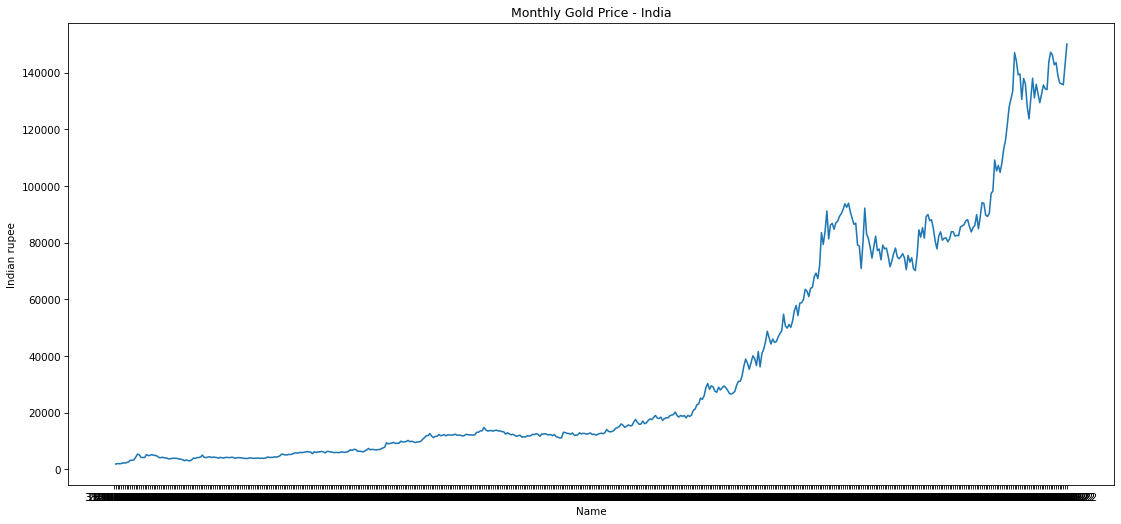

In [ ]:
plt.figure(figsize = (18,8))
sns.lineplot(data=monthlyPrices, x="Name", y="Indian rupee")
plt.title('Monthly Gold Price - India')
plt.show()

In [ ]:
indiaPrices = pd.DataFrame(columns=['time','price'])
indiaPrices.price = monthlyPrices['Indian rupee']
#indiaPrices['price']=indiaPrices['price'].fillna(indiaPrices['price'].mean())
indiaPrices.price = indiaPrices.price.bfill()
#indiaPrices.time = pd.date_range(start='31-12-1978',end='30-12-2022',freq='1M')
indiaPrices.time = pd.to_datetime(monthlyPrices['Name'],format="%d-%m-%Y")
#indiaPrices.set_index('time', inplace=True)
temp=indiaPrices.copy()
indiaPrices.head()

,time,price
0,1978-12-31,1840.8
1,1979-01-31,1840.8
2,1979-02-28,2011.7
3,1979-03-30,1940.2
4,1979-04-30,2013.1


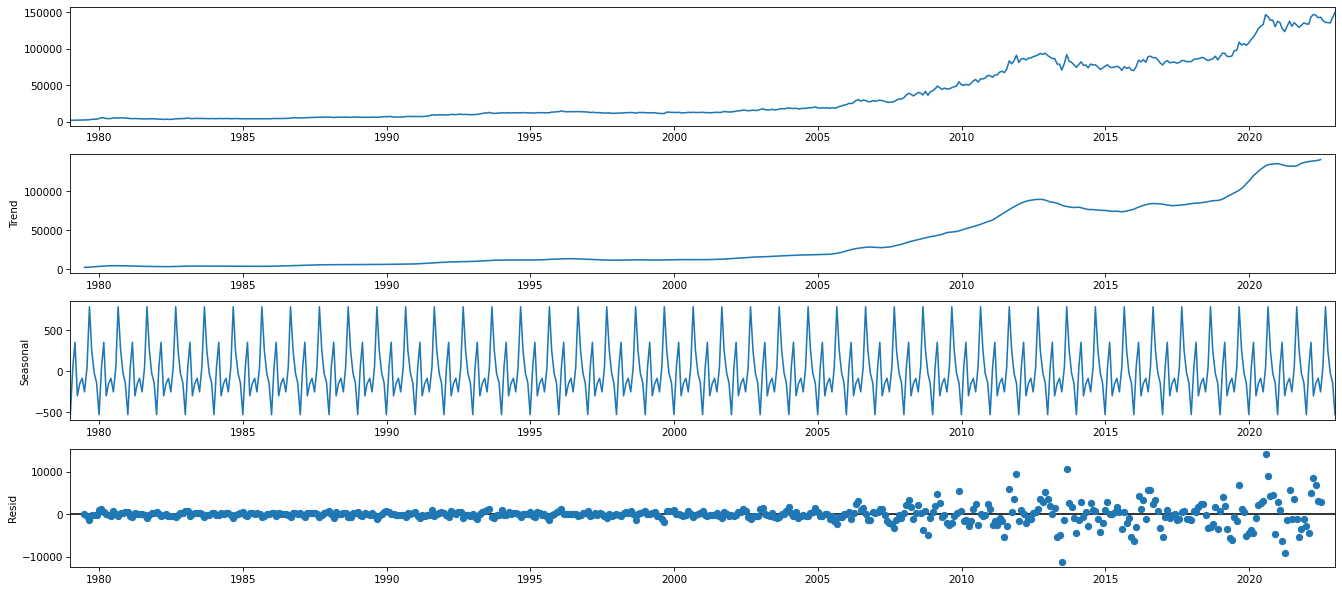

In [ ]:
temp.set_index('time', inplace=True)
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(temp, model='additive',period=12)
result.plot()
plt.show()

In [ ]:
X_train = indiaPrices[:529]
train_temp = X_train
X_test = indiaPrices[397:]


print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)

X_train Shape (529, 2)
X_test Shape (132, 2)


In [ ]:
X_train = X_train[['time', 'price']]
X_test = X_test[['time', 'price']]

X_train.set_index('time', inplace=True)
X_test.set_index('time', inplace=True)

In [ ]:
X_train = indiaPrices
X_train.set_index('time', inplace=True)

In [ ]:
X_train.shape, X_test.shape

((529, 1), (132, 1))

## ARIMA Model

### Creating ADF (Augmented Dickey Fuller) function

In [ ]:
def calculate_adf(data):
    X_train = adfuller(data, autolag='AIC')
    adf = X_train[0]
    pvalue = X_train[1]
    critical_value = X_train[4]['5%']
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations', 'Critical Value']
    for value,label in zip(X_train,labels):
        print(label+' : '+str(value) )

    if (pvalue < 0.05):
        print("** Data Is Stationary **")
    else:
        print("** Indicating It Is Non-Stationary **")

calculate_adf(X_train)

ADF Test Statistic : 1.888194828158983
p-value : 0.998508787873953
#Lags Used : 11
Number of Observations : 517
Critical Value : {'1%': -3.443061925077973, '5%': -2.8671466525252014, '10%': -2.5697561378507907}
** Indicating It Is Non-Stationary **


In [ ]:
data_diff = X_train.diff()
data_diff.dropna(inplace=True)
calculate_adf(data_diff)

ADF Test Statistic : -5.522603939425775
p-value : 1.8630353035479791e-06
#Lags Used : 10
Number of Observations : 517
Critical Value : {'1%': -3.443061925077973, '5%': -2.8671466525252014, '10%': -2.5697561378507907}
** Data Is Stationary **


In [ ]:
data_diff2 = data_diff.diff()
data_diff2.dropna(inplace=True)
calculate_adf(data_diff2)

ADF Test Statistic : -9.005418214867444
p-value : 6.331122246413547e-15
#Lags Used : 19
Number of Observations : 507
Critical Value : {'1%': -3.4433139398425348, '5%': -2.867257567756961, '10%': -2.5698152474041915}
** Data Is Stationary **


Therefore we take d=1

Calculating p and q

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


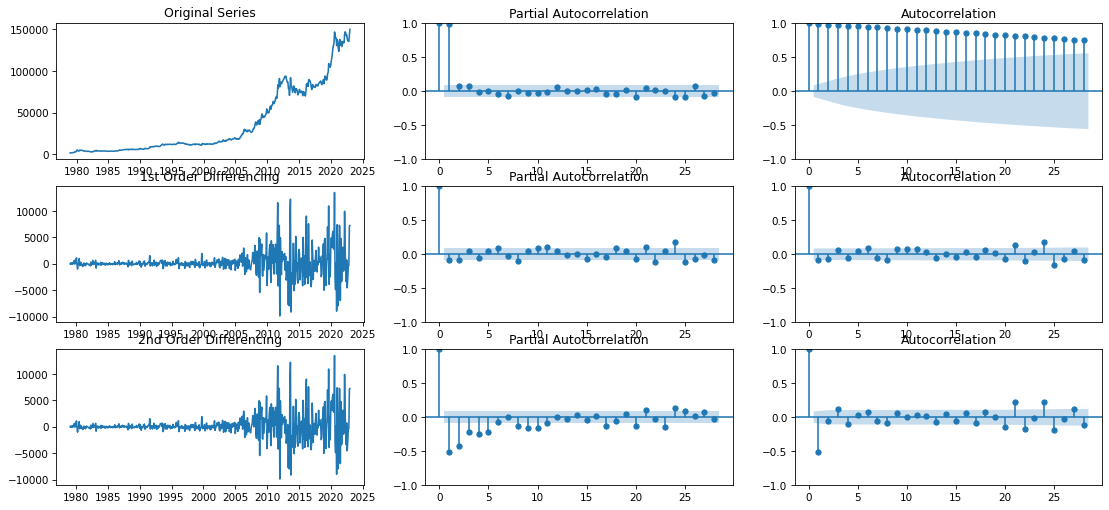

In [ ]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(3, 3)
axes[0, 0].plot(X_train); axes[0, 0].set_title('Original Series')
plot_pacf(X_train, ax=axes[0, 1])
plot_acf(X_train, ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(X_train.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(X_train.diff().dropna(), ax=axes[1, 1])
plot_acf(X_train.diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(X_train.diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf((X_train.diff()).diff().dropna(), ax=axes[2, 1])
plot_acf((X_train.diff()).diff().dropna(), ax=axes[2, 2])

plt.show()

In [ ]:
X_train.shape, X_test.shape

((529, 1), (132, 1))

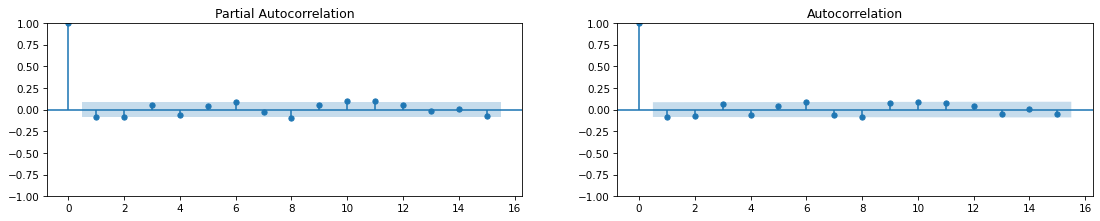

In [ ]:
plt.rcParams.update({'figure.figsize':(18,3), 'figure.dpi':75})
fig, ax = plt.subplots(1, 2)
plot_pacf(X_train.diff().dropna(), lags = 15, ax=ax[0])
plot_acf(X_train.diff().dropna(), lags = 15, ax=ax[1])
plt.show()

In [ ]:
X_train.reset_index(drop=True, inplace=True)

In [ ]:
X_train = X_train.loc[~X_train.index.duplicated()]

model_arima = ARIMA(X_train['price'], order = (5, 2, 1))
arima_521 = model_arima.fit()
print(arima_521.summary())

#model_arima = ARIMA(X_train['price'], order = (0, 1, 0))
#arima_521 = model_arima.fit()
#print(arima_521.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  529
Model:                 ARIMA(5, 2, 1)   Log Likelihood               -4852.567
Date:                Sun, 02 Apr 2023   AIC                           9719.133
Time:                        13:18:13   BIC                           9749.003
Sample:                             0   HQIC                          9730.828
                                - 529                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1042      0.027     -3.826      0.000      -0.158      -0.051
ar.L2         -0.1031      0.026     -3.961      0.000      -0.154      -0.052
ar.L3          0.0286      0.027      1.069      0.2

In [ ]:
index_15_months = pd.date_range(X_test.index[-1], freq='MS', periods=15)
index_15_months

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
arima_521_forecast = arima_521.forecast(15)
arima_521_forecast_Series = pd.Series(arima_521_forecast)
arima_521_forecast_Series.index = index_15_months
arima_521_forecast = arima_521_forecast.rename("Prediction")

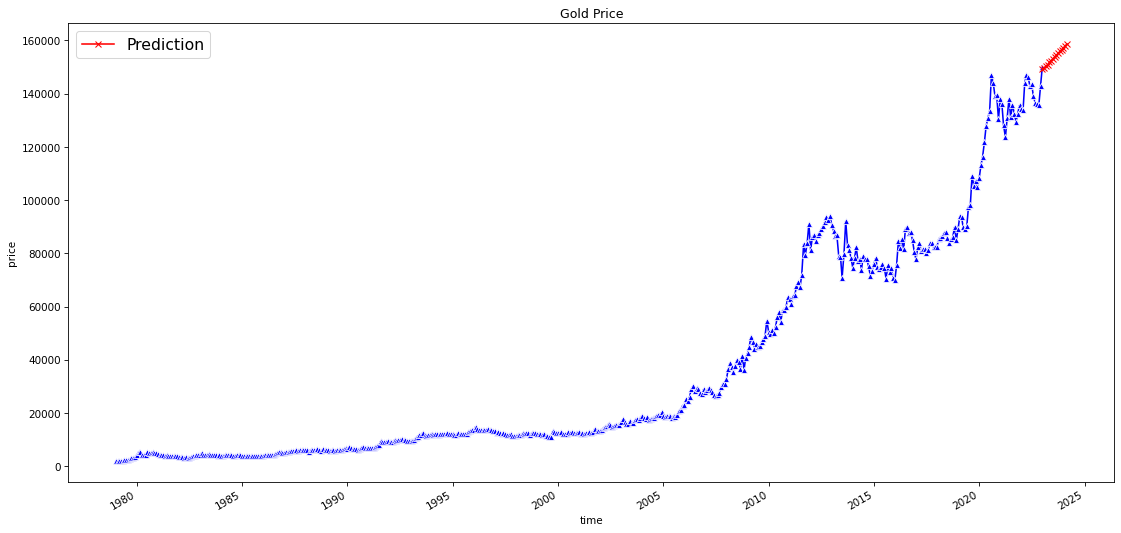

In [ ]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'time', y='price', data=indiaPrices, color = 'blue', marker = '^')
arima_521_forecast.plot(ax = ax, c = 'red', marker = 'x', label = 'Prediction')
plt.title('Gold Price')
# ax.axvline(x = 522, ls = ':', linewidth = 3, c = 'green', label = 'Border')
plt.legend(loc = 0, fontsize = 15)
plt.show()

## Autoregression model

In [ ]:
from statsmodels.tsa.ar_model import AR

In [ ]:
model_arma = ARIMA(X_train['price'], order = (2, 0, 1))
arma_201 = model_arma.fit()
print(arma_201.summary())


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  529
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -4880.409
Date:                Sun, 02 Apr 2023   AIC                           9770.819
Time:                        13:22:30   BIC                           9792.174
Sample:                             0   HQIC                          9779.178
                                - 529                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.646e+04   8.26e-08   4.41e+11      0.000    3.65e+04    3.65e+04
ar.L1          0.1644      0.259      0.635      0.525      -0.343       0.672
ar.L2          0.8347      0.259      3.226      0.0

In [ ]:
arma_201_forecast = arma_201.forecast(15)
arma_201_forecast_Series = pd.Series(arma_201_forecast)
arma_201_forecast_Series.index = index_15_months
arma_201_forecast = arma_201_forecast.rename("Prediction")

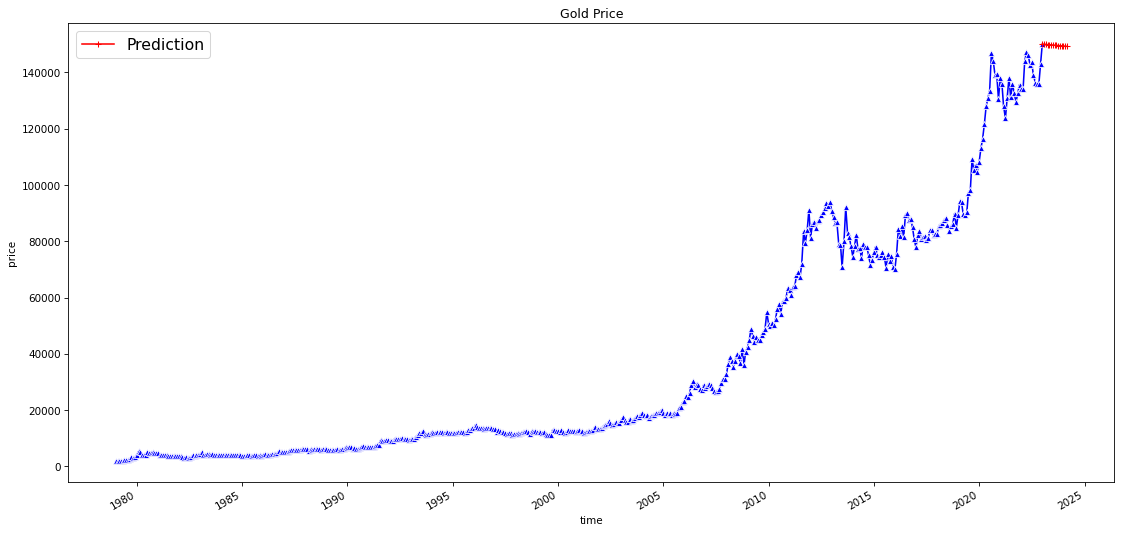

In [ ]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'time', y='price', data=indiaPrices, color = 'blue', marker = '^')
arma_201_forecast.plot(ax = ax, c = 'red', marker = '+', label = 'Prediction')
plt.title('Gold Price')
# ax.axvline(x = 522, ls = ':', linewidth = 3, c = 'green', label = 'Border')
plt.legend(loc = 0, fontsize = 15)
plt.show()

## Exponential MovingAverage

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

ema_model = SimpleExpSmoothing(np.asarray(X_train['price'])).fit(smoothing_level=0.6,optimized=False)
print(ema_model.summary())


                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  endog   No. Observations:                  529
Model:             SimpleExpSmoothing   SSE                     3466869482.506
Optimized:                      False   AIC                           8306.935
Trend:                           None   BIC                           8315.477
Seasonal:                        None   AICC                          8307.011
Seasonal Periods:                None   Date:                 Sun, 02 Apr 2023
Box-Cox:                        False   Time:                         13:22:43
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.6000000                alpha                False
initial_level              1840.8000                

In [ ]:
ema_forecast = ema_model.forecast(15)
ema_forecast_Series = pd.Series(ema_forecast)
ema_forecast_df = pd.DataFrame(ema_forecast_Series, columns = ['price'])
ema_forecast_df.index = index_15_months
ema_forecast_df.rename_axis(None, axis=1).rename_axis('time', axis=0)


,price
time,
2023-01-01,146085.782729
2023-02-01,146085.782729
2023-03-01,146085.782729
2023-04-01,146085.782729
2023-05-01,146085.782729
2023-06-01,146085.782729
2023-07-01,146085.782729
2023-08-01,146085.782729
2023-09-01,146085.782729


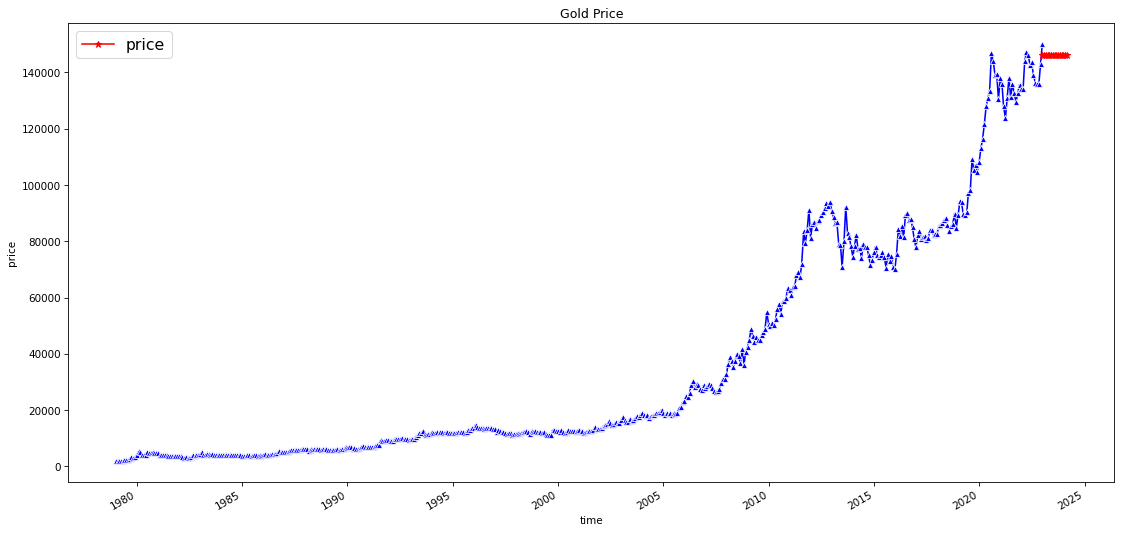

In [ ]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'time', y='price', data=indiaPrices, color = 'blue', marker = '^')
ema_forecast_df.plot(ax = ax, c = 'red', marker = '*', label = 'Prediction')
# X_test.plot(ax = ax, c = 'blue', marker = '^')
plt.title('Gold Price')
# ax.axvline(x = 522, ls = ':', linewidth = 3, c = 'green', label = 'Border')
plt.legend(loc = 0, fontsize = 15)
plt.show()

## SARIMAX Model

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarimax = SARIMAX(endog=X_train['price'],order=(5,2,1),seasonal_order=(0,0,1,6),trend='c',enforce_invertibility=False)
# model_arima = ARIMA(X_train['price'], order = (5, 2, 1))
model_sarimax_0016 = model_sarimax.fit()
print(model_sarimax_0016.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             price   No. Observations:                  529
Model:             SARIMAX(5, 2, 1)x(0, 0, 1, 6)   Log Likelihood               -4850.167
Date:                           Sun, 02 Apr 2023   AIC                           9718.334
Time:                                   13:22:55   BIC                           9756.739
Sample:                                        0   HQIC                          9733.370
                                           - 529                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9588      0.629      3.114      0.002       0.726       3.192
ar.L1         -0.1023      0.028     -3.670

In [ ]:
model_sarimax_0016_forecast = model_sarimax_0016.forecast(15)
model_sarimax_0016_forecast_Series = pd.Series(model_sarimax_0016_forecast)
model_sarimax_0016_forecast_Series.index = index_15_months
model_sarimax_0016_forecast = model_sarimax_0016_forecast.rename("Prediction")

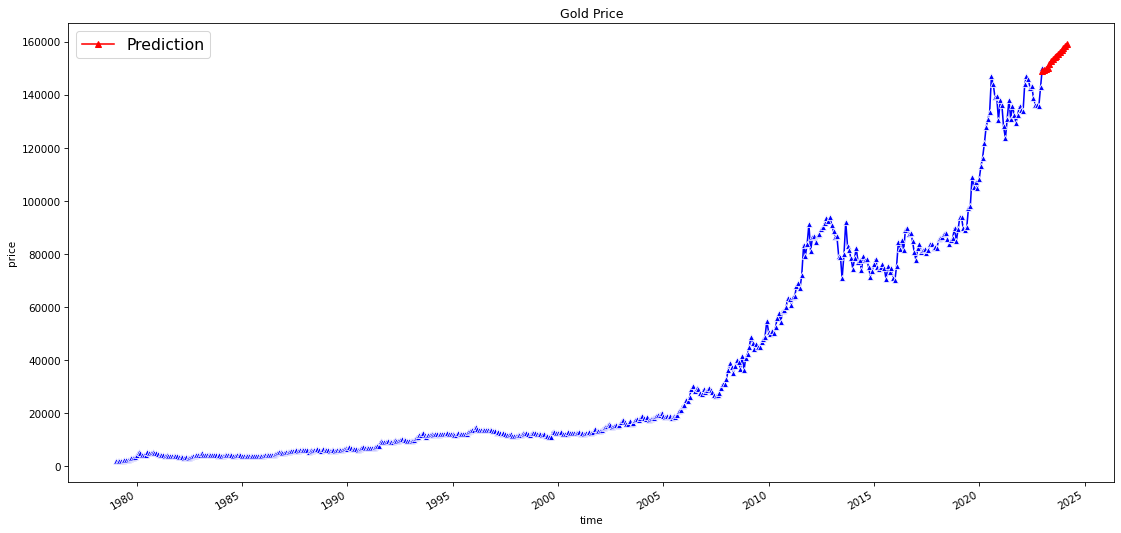

In [ ]:
fig, ax = plt.subplots(figsize = (18, 9))
sns.lineplot(x = 'time', y='price', data=indiaPrices, color = 'blue', marker = '^')
model_sarimax_0016_forecast.plot(ax = ax, c = 'red', marker = '^', label = 'Prediction')
plt.title('Gold Price')
# ax.axvline(x = 522, ls = ':', linewidth = 3, c = 'green', label = 'Border')
plt.legend(loc = 0, fontsize = 15)
plt.show()

In [ ]:
monthlyPrices.head()

,Name,Indian rupee,Chinese renmimbi,US dollar,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Euro,Russian ruble
0,31-12-1978,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN
1,31-01-1979,1840.8,NaN,233.7,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,144.8,NaN
2,28-02-1979,2011.7,NaN,251.3,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,154.6,NaN
3,30-03-1979,1940.2,NaN,240.1,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,148.0,NaN
4,30-04-1979,2013.1,NaN,245.3,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,152.8,NaN


In [ ]:
df1 = monthlyPrices.set_index('Name')

In [ ]:
df1['rupee_previous_day'] = df1['Indian rupee'].shift(1)

In [ ]:
df1['US dollar'] = df1['US dollar'].bfill()
df1['Indian rupee'] = df1['Indian rupee'].bfill()
df1['Euro'] = df1['Euro'].bfill()
df1['rupee_previous_day'] = df1['rupee_previous_day'].bfill()
df1.head()

,Indian rupee,Chinese renmimbi,US dollar,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Euro,Russian ruble,rupee_previous_day
Name,,,,,,,,,,,,,,
31-12-1978,1840.8,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN,1840.8
31-01-1979,1840.8,NaN,233.7,NaN,745.2,139739.3,856.1,4511.3,NaN,NaN,108235.8,144.8,NaN,1840.8
28-02-1979,2011.7,NaN,251.3,NaN,827.8,154683.1,946.6,4985.7,NaN,NaN,119929.3,154.6,NaN,1840.8
30-03-1979,1940.2,NaN,240.1,NaN,796.7,148844.2,910.4,4812.9,NaN,NaN,116123.6,148.0,NaN,2011.7
30-04-1979,2013.1,NaN,245.3,NaN,819.4,152453.6,930.2,4891.0,NaN,NaN,117423.3,152.8,NaN,1940.2


In [ ]:
# define features & target
#features = ['US dollar','Euro']
features = ['rupee_previous_day']
X = df1[features]   # features
y = df1[['Indian rupee']]  # target

In [ ]:
import gc
# keras libraries
import tensorflow as tf
from tensorflow import keras as k
from tqdm.keras import TqdmCallback

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import model_selection

In [ ]:
# instantiate MinMax Scaler function
mms = preprocessing.MinMaxScaler()

# applying the scaler function to features
X = mms.fit_transform(X)
y = mms.fit_transform(y)

In [ ]:
# splitting to Training set and Test set
tss = model_selection.TimeSeriesSplit()

for train_index, test_index in tss.split(X):
  X_train, X_test = X[:len(train_index)], X[len(train_index): (len(train_index)+len(test_index))]
  y_train, y_test = y[:len(train_index)], y[len(train_index): (len(train_index)+len(test_index))]

In [ ]:
# convert to array
trainX = np.array(X_train)
testX = np.array(X_test)

# reshape
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
#X_test.head()

In [ ]:
# training data shape
print('Number of rows and columns in training : ', X_train.shape)
print('Number of rows and columns in test : ', X_test.shape)

Number of rows and columns in training :  (441, 1, 1)
Number of rows and columns in test :  (88, 1, 1)


In [ ]:
# build the model architecture
model = k.models.Sequential()

# add input layer (first LSTM layer)
model.add(k.layers.LSTM(units=32
                        ,return_sequences=False
                        ,input_shape=(1, trainX.shape[1])
                        ,activation='tanh'))

# add drop out (to prevent overfitting)
model.add(k.layers.Dropout(0.5))

# add output layer
model.add(k.layers.Dense(units=1, name='Output_Layer'))

# compile model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

# summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 Output_Layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


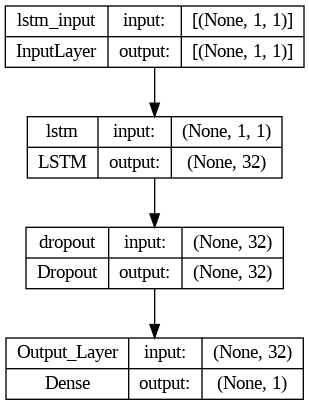

In [ ]:
# plot model architecture
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# model fit params
epoch = 150

# clear session (for re-running/training)
gc.collect()
k.backend.clear_session()

# fit model
hist = model.fit(X_train
                 ,y_train
                 ,validation_data= (X_test, y_test)
                 ,epochs=epoch
                 ,verbose=0
                ,callbacks=[TqdmCallback(verbose=0)]
                , batch_size=8
                )

0epoch [00:00, ?epoch/s]

In [ ]:
# view loss value
loss = '{:.2e}'.format(hist.history['loss'][-1])
print(f"Our model's loss value dropped to {loss} over {epoch}")

Our model's loss value dropped to 1.15e-03 over 150


In [ ]:
# prediction
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 4ms/step


array([[0.48880136],
       [0.4731639 ],
       [0.48340672],
       [0.4574291 ],
       [0.45302862],
       [0.4889164 ],
       [0.5497126 ],
       [0.5323294 ],
       [0.5549617 ],
       [0.5298978 ],
       [0.5810225 ],
       [0.58607775],
       [0.5711579 ],
       [0.5736618 ],
       [0.552774  ],
       [0.52372754],
       [0.5044279 ],
       [0.5347887 ],
       [0.5448225 ],
       [0.52503777],
       [0.52932274],
       [0.53083444],
       [0.521413  ],
       [0.52827364],
       [0.54538226],
       [0.5450919 ],
       [0.53469986],
       [0.5365728 ],
       [0.5355896 ],
       [0.5568018 ],
       [0.5588422 ],
       [0.5621488 ],
       [0.57090515],
       [0.5739065 ],
       [0.55764   ],
       [0.54460895],
       [0.555017  ],
       [0.56026196],
       [0.585711  ],
       [0.55213195],
       [0.58202964],
       [0.61450154],
       [0.6125911 ],
       [0.58503217],
       [0.58132446],
       [0.58873796],
       [0.63574576],
       [0.642

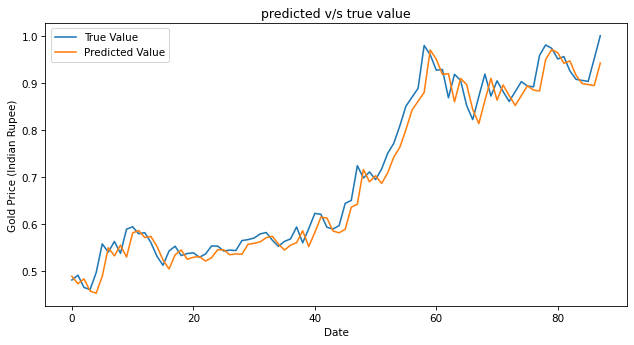

In [ ]:
# comparing predicted v/s true value'
plt.figure(figsize=(10,5))
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title("predicted v/s true value")
plt.xlabel('Date')
plt.ylabel('Gold Price (Indian Rupee)')
plt.legend()
plt.show()

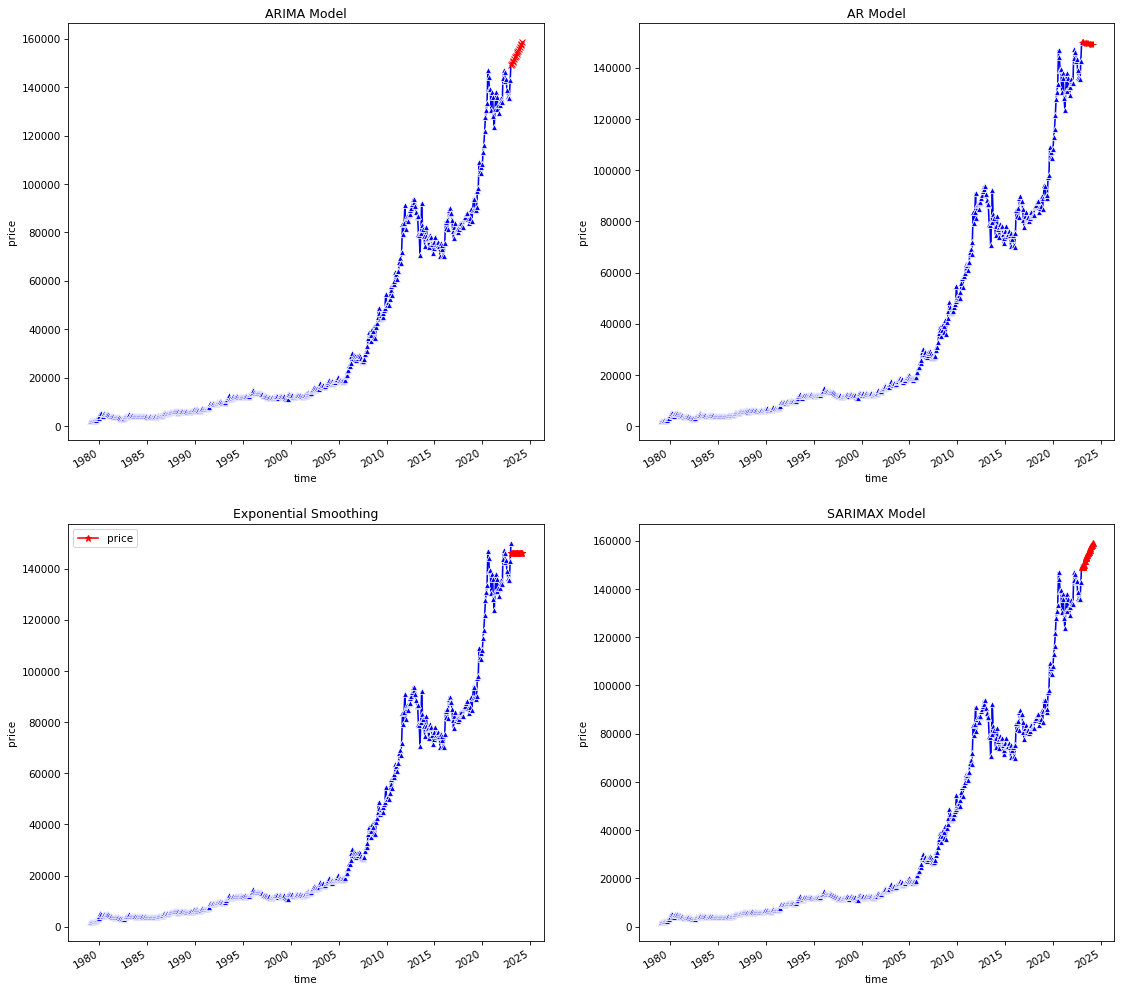

In [ ]:
plt.rcParams.update({'figure.figsize':(18,18), 'figure.dpi':75})

# Original Series
fig, axes = plt.subplots(2, 2)



sns.lineplot(x = 'time', y='price', data=indiaPrices, color = 'blue', marker = '^',ax=axes[0,0])
arima_521_forecast.plot(ax = axes[0,0], c = 'red', marker = 'x', label = 'Prediction')
#plt.title('ARIMA Model')
# ax.axvline(x = 522, ls = ':', linewidth = 3, c = 'green', label = 'Border')
#plt.legend(loc = 0, fontsize = 15)
#plt.show()
#plt.legend(loc = 0, fontsize = 15)

sns.lineplot(x = 'time', y='price', data=indiaPrices, color = 'blue', marker = '^',ax=axes[0,1])
arma_201_forecast.plot(ax=axes[0,1], c = 'red', marker = '+', label = 'Prediction')
#plt.title('AR Model')
# ax.axvline(x = 522, ls = ':', linewidth = 3, c = 'green', label = 'Border')
#plt.legend(loc = 0, fontsize = 15)
#plt.show()


sns.lineplot(x = 'time', y='price', data=indiaPrices, color = 'blue', marker = '^',ax=axes[1,0])
ema_forecast_df.plot(ax = axes[1,0], c = 'red', marker = '*', label = 'Prediction')
# X_test.plot(ax = ax, c = 'blue', marker = '^')
#plt.title('Exponential Smoothing')
# ax.axvline(x = 522, ls = ':', linewidth = 3, c = 'green', label = 'Border')
#plt.legend(loc = 0, fontsize = 15)
#plt.show()


sns.lineplot(x = 'time', y='price', data=indiaPrices, color = 'blue', marker = '^',ax=axes[1,1])
model_sarimax_0016_forecast.plot(ax=axes[1,1], c = 'red', marker = '^', label = 'Prediction')
#plt.title('SARIMAX Model')
# ax.axvline(x = 522, ls = ':', linewidth = 3, c = 'green', label = 'Border')
#plt.legend(loc = 0, fontsize = 15)

axes[0,0].set_title('ARIMA Model')
axes[0,1].set_title('AR Model')
axes[1,0].set_title('Exponential Smoothing')
axes[1,1].set_title('SARIMAX Model')


plt.show()